## Data Describtion
- **price**: Price in US dollars (\$326--\$18,823)
- **carat**: Weight of the diamond (0.2--5.01)
- **cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color**: Diamond color, from J (worst) to D (best)
- **clarity**: A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x**: Length in mm (0--10.74)
- **y**: Width in mm (0--58.9)
- **z**: Depth in mm (0--31.8)
- **table**: Width of the top of the diamond relative to the widest point (43--95)


## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
color_palette=sns.color_palette
plt.style.use('fivethirtyeight')

## Read Data

In [3]:
data=pd.read_csv('train.csv')
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


## Explore Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
#check missing values
data.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
#check duplicates
data.duplicated().sum()

0

In [7]:
data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
cat_data=data.select_dtypes(include='object')
num_data=data.select_dtypes(exclude='object')
num_data=num_data.drop('Id',axis=1)

In [11]:
num_data=num_data.astype('int')

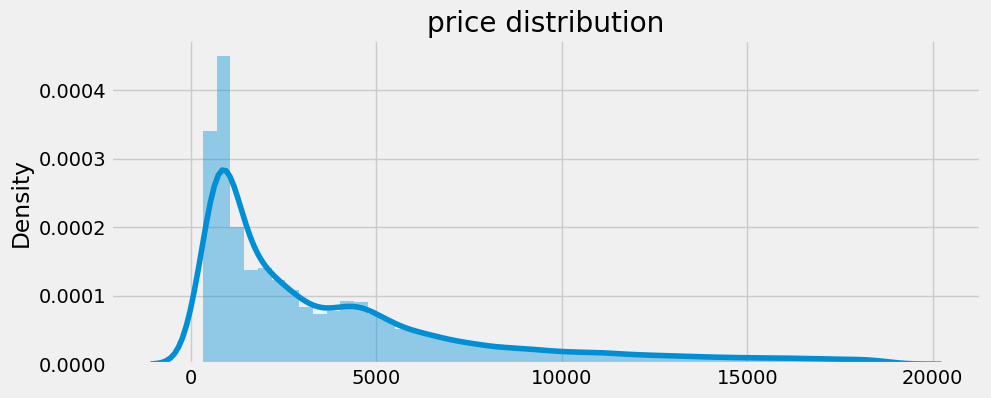

count    43152.000000
mean      3929.491912
std       3985.527795
min        326.000000
25%        947.750000
50%       2401.000000
75%       5312.000000
max      18823.000000
Name: price, dtype: float64

In [12]:
plt.figure(figsize=(10, 4))

sns.distplot(x=num_data['price'])
plt.title('price distribution')
plt.show()
num_data['price'].describe()

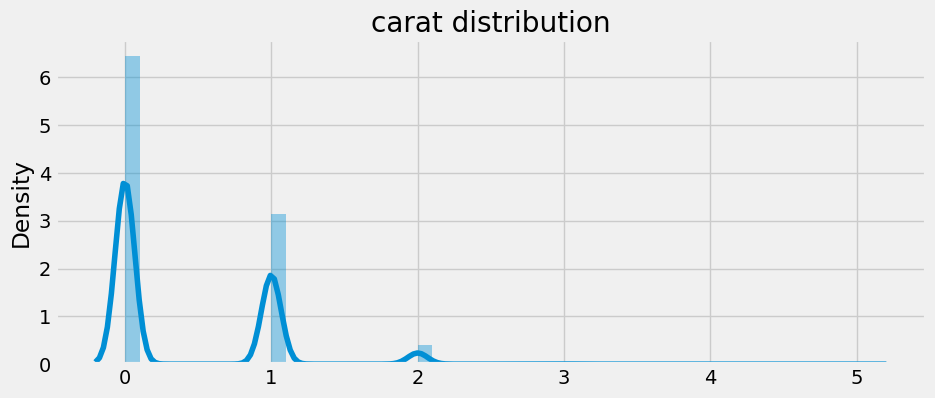

count    43152.000000
mean         0.394906
std          0.567711
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: carat, dtype: float64

In [13]:
plt.figure(figsize=(10, 4))

sns.distplot(x=num_data['carat'])
plt.xticks(num_data['carat'].unique())
plt.title('carat distribution')
plt.show()
num_data['carat'].describe()

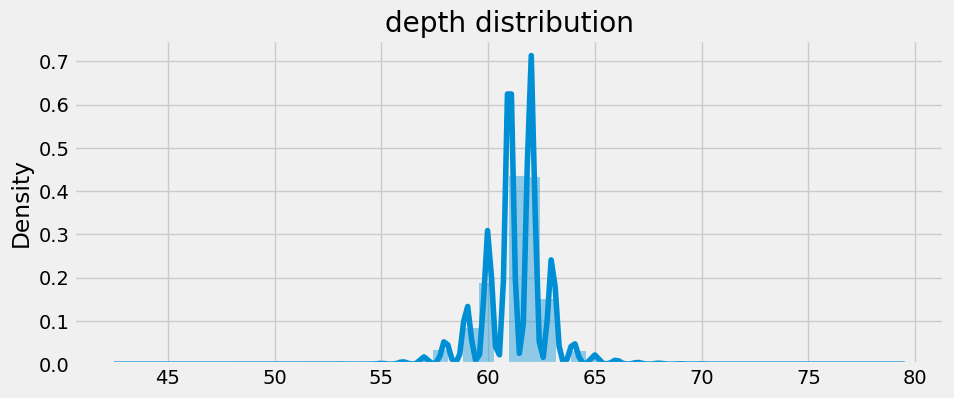

count    43152.000000
mean        61.297321
std          1.458052
min         43.000000
25%         61.000000
50%         61.000000
75%         62.000000
max         79.000000
Name: depth, dtype: float64

In [15]:
plt.figure(figsize=(10, 4))

sns.distplot(x=num_data['depth'])
plt.title('depth distribution')
plt.show()
num_data['depth'].describe()

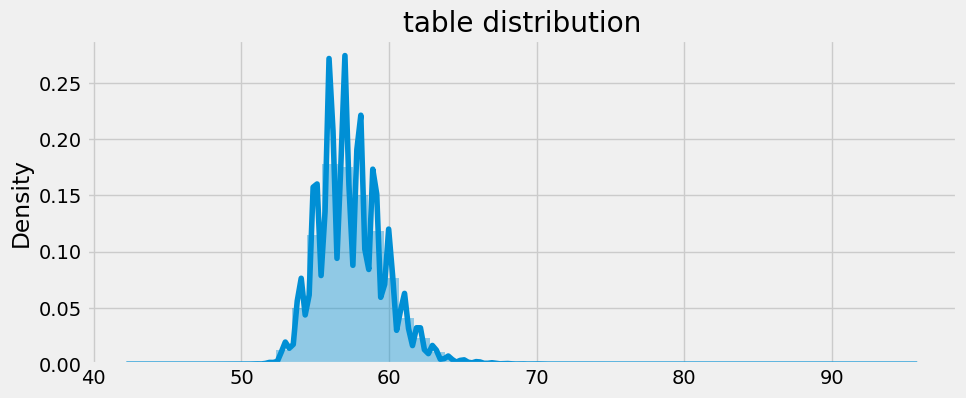

count    43152.000000
mean        57.450060
std          2.239037
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [16]:
plt.figure(figsize=(10, 4))

sns.distplot(x=num_data['table'])
plt.title('table distribution')
plt.show()
num_data['table'].describe()

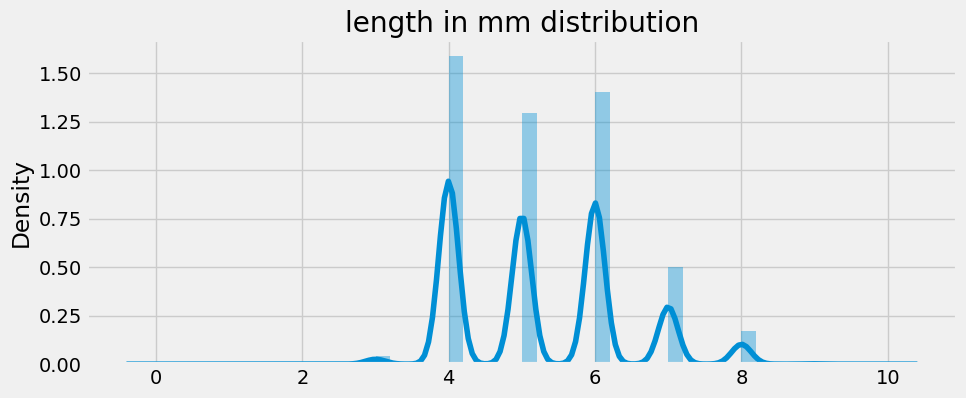

count    43152.000000
mean         5.250278
std          1.137252
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         10.000000
Name: x, dtype: float64

In [17]:
plt.figure(figsize=(10, 4))

sns.distplot(x=num_data['x'])
plt.title('length in mm distribution')
plt.show()
num_data['x'].describe()

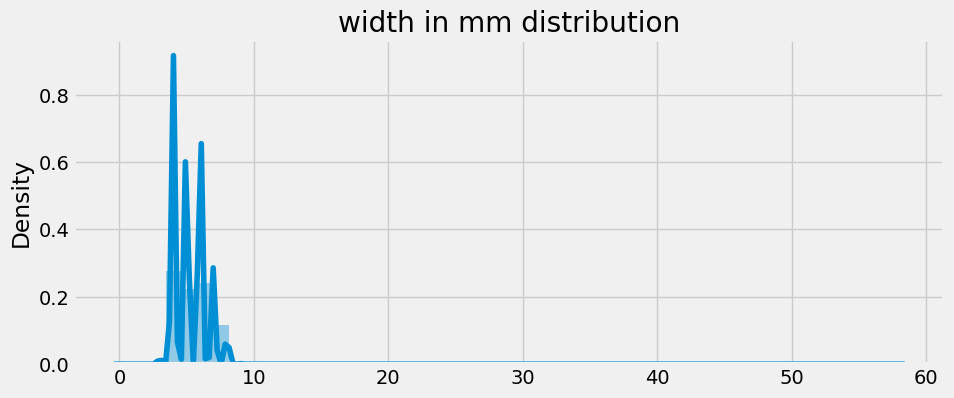

count    43152.000000
mean         5.251622
std          1.163749
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max         58.000000
Name: y, dtype: float64

In [18]:
plt.figure(figsize=(10, 4))

sns.distplot(x=num_data['y'])
plt.title('width in mm distribution')
plt.show()
num_data['y'].describe()

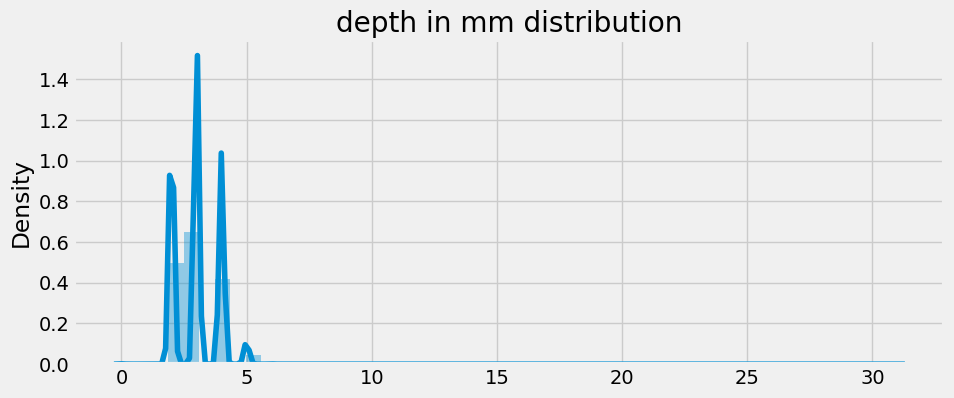

count    43152.000000
mean         3.008922
std          0.839810
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         31.000000
Name: z, dtype: float64

In [19]:
plt.figure(figsize=(10, 4))

sns.distplot(x=num_data['z'])
plt.title('depth in mm distribution')
plt.show()
num_data['z'].describe()

### 📈we can see:
- The average price of the diamonds is approximately 3929.49 .
- min is 326.0
- max is  18823.0

</b>

- The average carat weight of the diamonds is approximately 0.395 carats.
- The smallest carat weight in the dataset is 0.0, which might indicate some missing or incorrect data.
- The largest carat weight observed in the dataset is 5.0, indicating the presence of some relatively large diamonds.


- The average width of the top of the diamond is approximately 57.45.
- The smallest width is 43.0.
- The largest width is 95.0.



**********
cut
cut
Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: count, dtype: int64


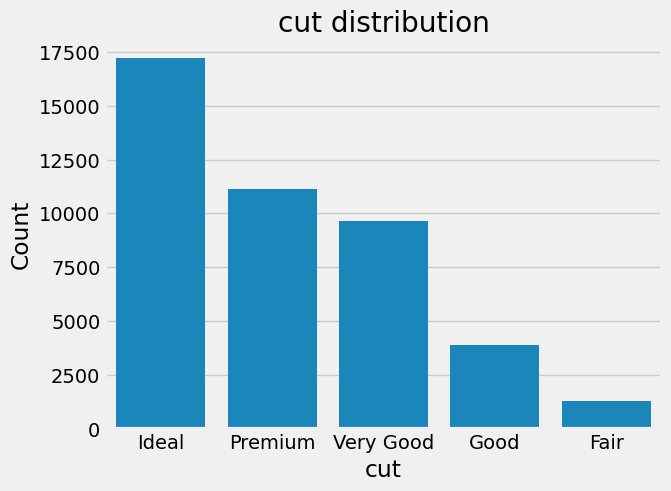

**********
color
color
G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: count, dtype: int64


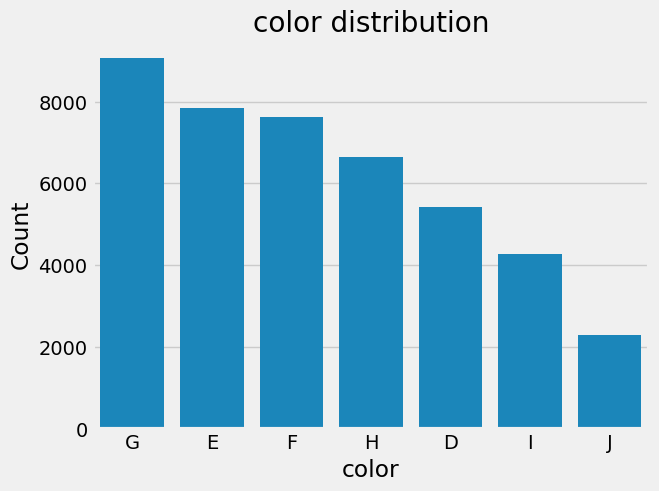

**********
clarity
clarity
SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: count, dtype: int64


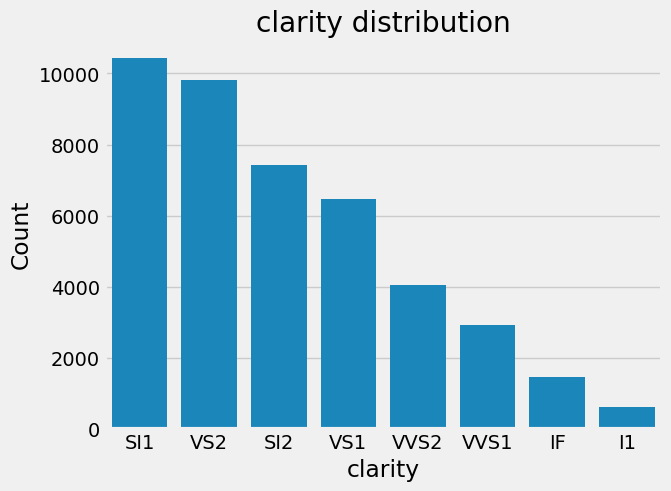

In [20]:
for col in cat_data.columns:
    print('*'*10)
    print(col)
    print(cat_data[col].value_counts())
    cats=cat_data[col].value_counts()
    sns.barplot(x=cats.index,y=cats.values)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## 📉 we can see:
#### cut:
- Ideal: This category is the most frequent, with 17,203 diamonds having an ideal cut. This suggests that a significant portion of the diamonds in the dataset have been cut to ideal proportions, potentially leading to higher overall quality and value.
- Premium: The premium cut comes in second place with 11,113 diamonds falling into this category. Although slightly less frequent than the ideal cut, the premium cut still represents a substantial portion of the dataset.
#### color:
- G: With 9,060 diamonds.These diamonds are typically near colorless and are considered high quality.
- E: with 7,832 diamonds are also near colorless and highly valued for their clarity and brilliance.
- F: The F color grade includes 7,633 diamonds. These diamonds are near colorless and exhibit minimal traces of color, contributing to their visual appeal.
#### clarity:
- SI1 (Slightly Included 1): This category has the highest count with 10,428.
- VS2 (Very Slightly Included 2): there are 9,824 VS2 diamonds. These diamonds have slight inclusions that are difficult to detect without magnification, making them highly desirable.
- SI2 (Slightly Included 2): With 7,432 diamonds have slightly larger and more noticeable inclusions compared to SI1 diamonds. However, many SI2 diamonds are still eye-clean and offer good value.


## Correlation between features

Text(0.5, 1.0, 'Correlation between features')

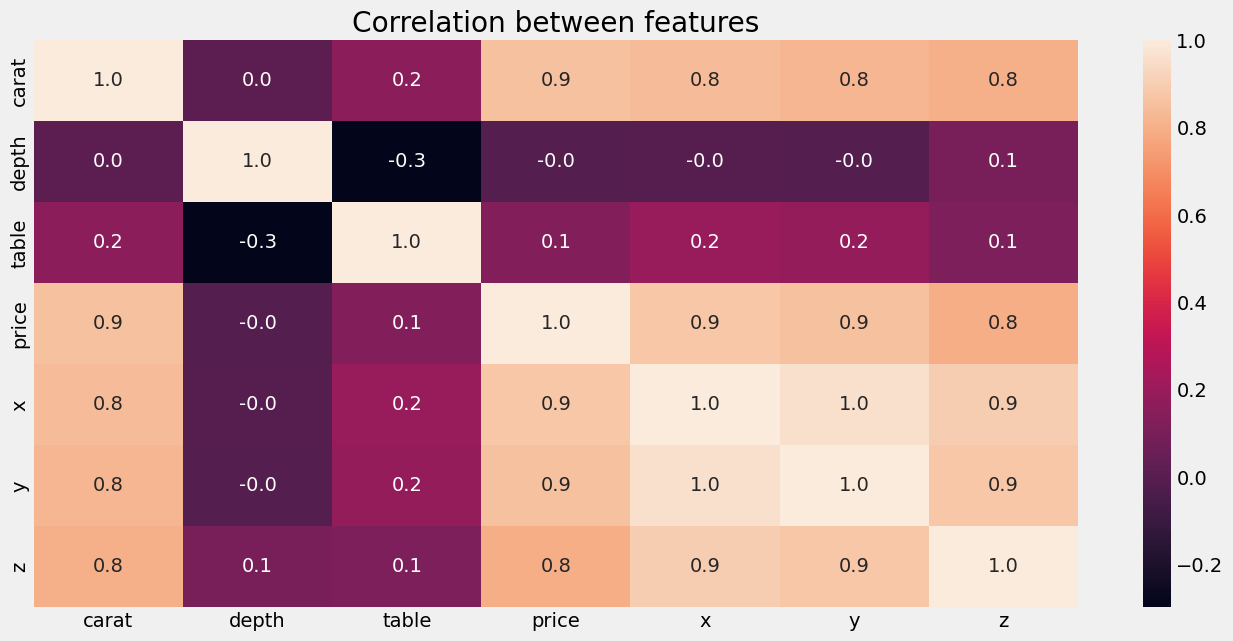

In [21]:
corr=num_data.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True,fmt='0.1f')
plt.title('Correlation between features')

## check outliers

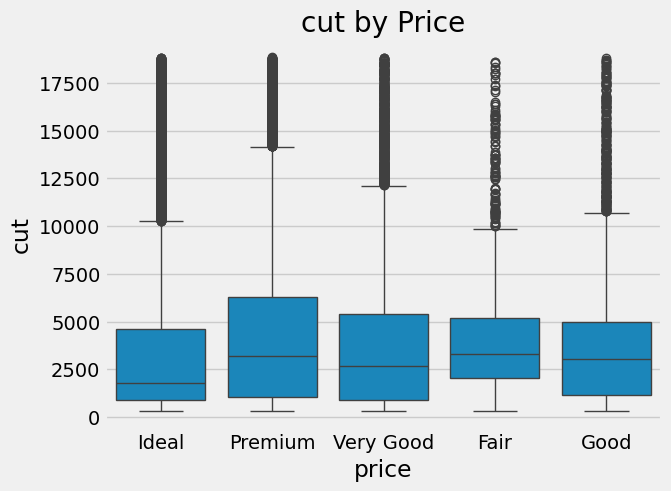

In [29]:
sns.boxplot(x=cat_data['cut'],y=num_data['price'])
plt.title('cut by Price')
plt.xlabel('price')
plt.ylabel('cut')
plt.show()

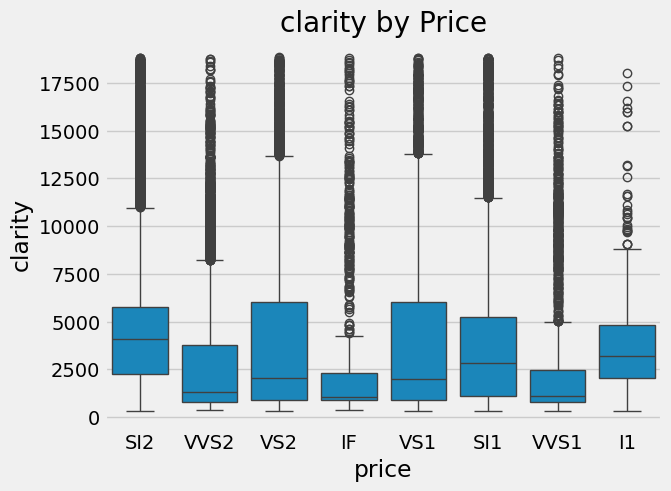

In [34]:
sns.boxplot(x=cat_data['clarity'],y=num_data['price'])
plt.title('clarity by Price')
plt.xlabel('price')
plt.ylabel('clarity')
plt.show()

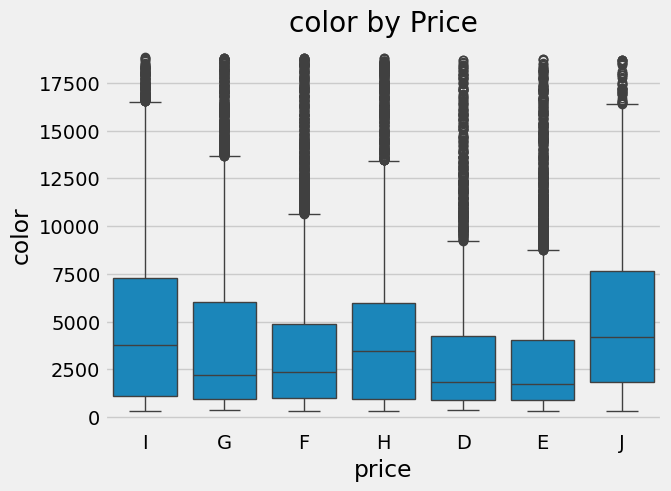

In [36]:
sns.boxplot(x=cat_data['color'],y=num_data['price'])
plt.title('color by Price')
plt.xlabel('price')
plt.ylabel('color')
plt.show()

## Ask Questions:

### does the weight,length,width,and depth affect the diamonds’price?

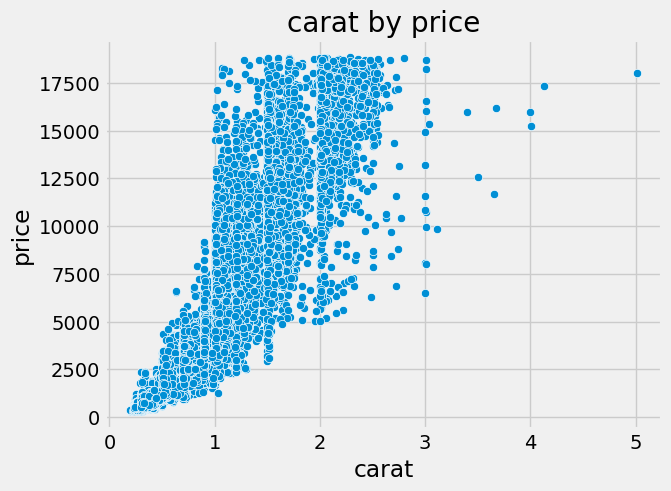

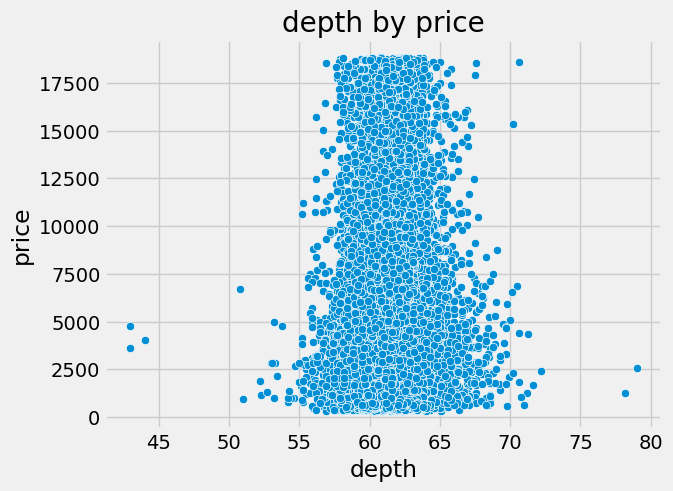

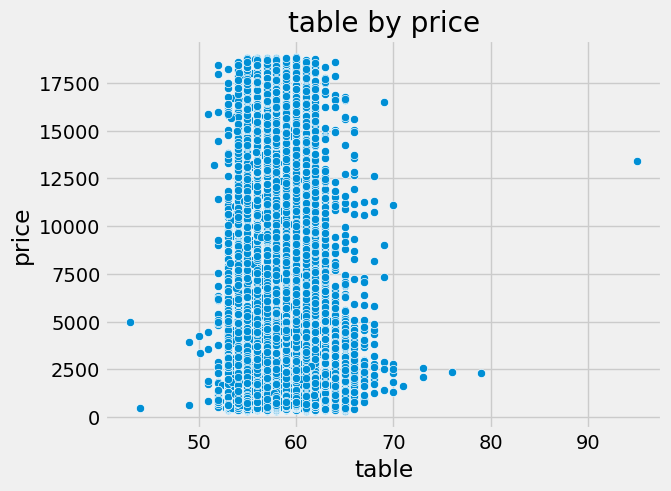

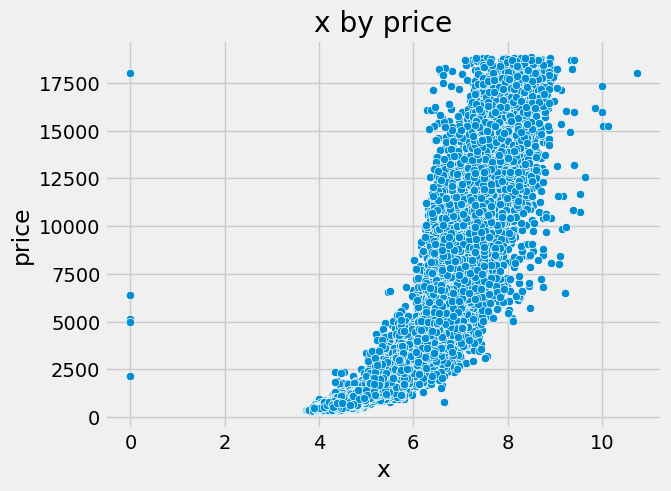

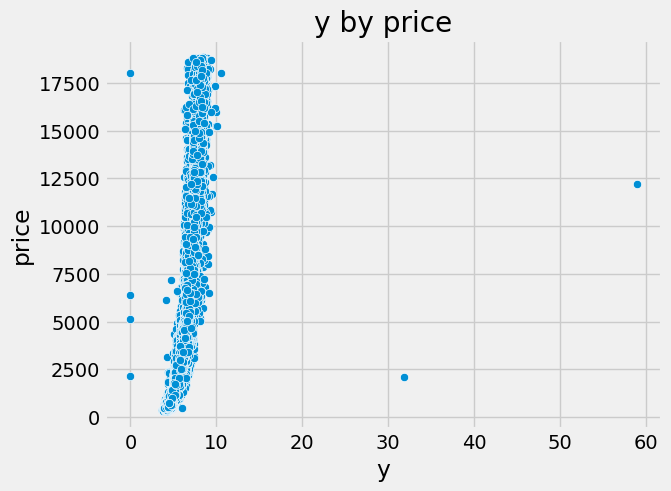

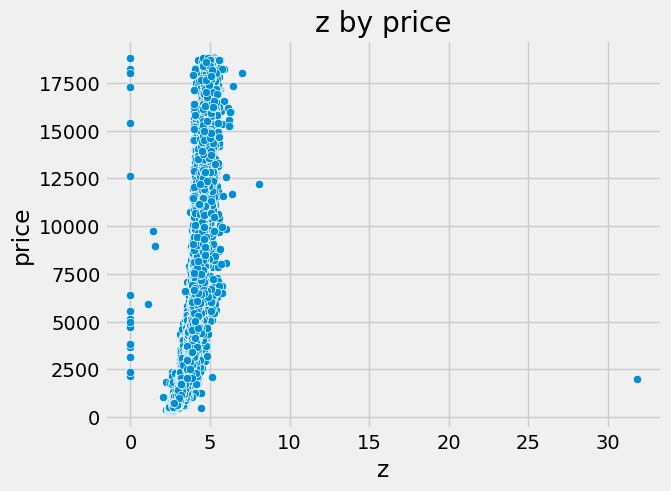

In [38]:
#fig,axes=plt.subplots(7,1,figsize=(15,8))
for col in num_data.columns:
    if col!='price':
        sns.scatterplot(data=num_data,x=data[col],y=data['price'],palette=['#FF5580'])
        plt.title(f'{col} by price')
        plt.xlabel(col)
        plt.ylabel('price')
        plt.show()

### we can conclude that :
- Based on the provided information, it seems that the dimensions x, y, and z, which represent the length, width, and depth of the diamonds, respectively, along with the carat weight, have a strongly positive correlation with the price of diamonds. This implies that as the dimensions and weight of the diamonds increase, their prices increase as well.

### does the colors affect on the price? 

In [39]:
group=data.groupby('color')['price'].mean()
group=group.sort_values(ascending=False)

In [40]:
group=pd.DataFrame(group)
group

,price
color,
J,5273.038865
I,5128.529426
H,4483.972485
G,3976.235430
F,3719.834010
D,3164.045932
E,3092.903218


### we can conclude that:
- Diamonds with higher color grades, such as D and E, tend to have lower average prices, while those with lower color grades, such as J, have higher average prices,This may be due to factors such as consumer preferences.

### Does the cut affect on price?

In [41]:
group=data.groupby('cut')['price'].mean()
group=group.sort_values(ascending=False)
group=pd.DataFrame(group)
group

,price
cut,
Premium,4589.864123
Fair,4359.600617
Very Good,3993.983641
Good,3929.679464
Ideal,3434.220369


### we can conclude that:
- it appears that there is a clear variation in diamond pricing based on the quality of the cut. Diamonds with a "Premium" cut have the highest average price, followed by those with a "Fair" cut. On the other hand, diamonds with an "Ideal" cut have the lowest average price among the categories listed. This suggests that the quality of the cut plays a significant role in determining the price of diamonds

In [45]:
group=pd.crosstab(data.color,data.cut,values=data.price,aggfunc=np.mean)
group

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,4427.838462,3447.931507,2623.320018,3599.182028,3443.515102
E,3817.135593,3404.715818,2599.454867,3612.051091,3197.141367
F,3729.114943,3453.066946,3356.672858,4283.976026,3862.898186
G,4316.937984,4097.274286,3688.044155,4482.920274,3854.360346
H,5123.095041,4332.286506,3848.191984,5234.087139,4541.668937
I,4484.503704,5127.632212,4415.221612,6056.646341,5333.525862
J,5009.404255,4513.888000,4869.863319,6144.004484,5131.914286


<Figure size 2000x1500 with 0 Axes>

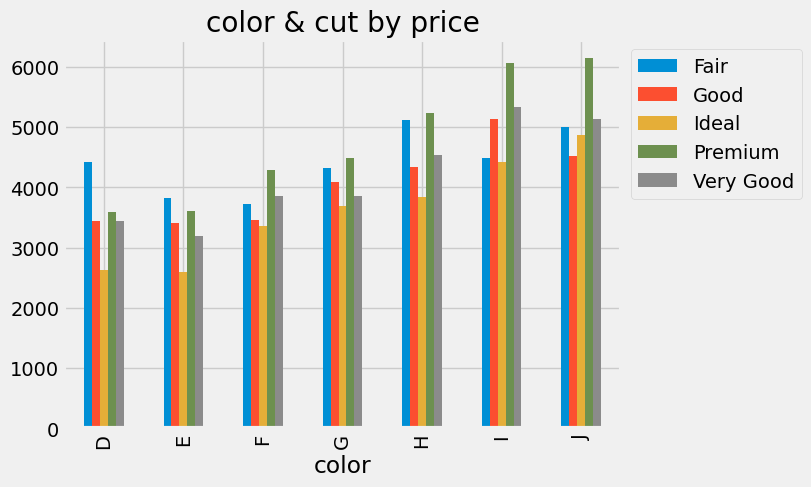

In [46]:
plt.figure(figsize=(20,15))
group.plot(kind='bar')
plt.title('color & cut by price')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

### we can conclude that:
- Diamonds with a cut of 'Ideal' tend to have the lowest average price across all color categories,followed by 'Very Good' cuts.
- Within each cut category, diamonds with higher color grades like(D, E) generally have higher average prices compared to those with lower color grades (H, I, J).
- For diamonds with the same color grade, the average price tends to increase with better cut quality.

In [187]:
data.columns

Index(['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [188]:
data.dtypes

Id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object